<a href="https://colab.research.google.com/github/Gabriel8Kbps/EngineeringProject2/blob/main/Construindo_Diagramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diagrams

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 17.1 MB/s eta 0:00:00


# Diagrama Arquitetural Simples

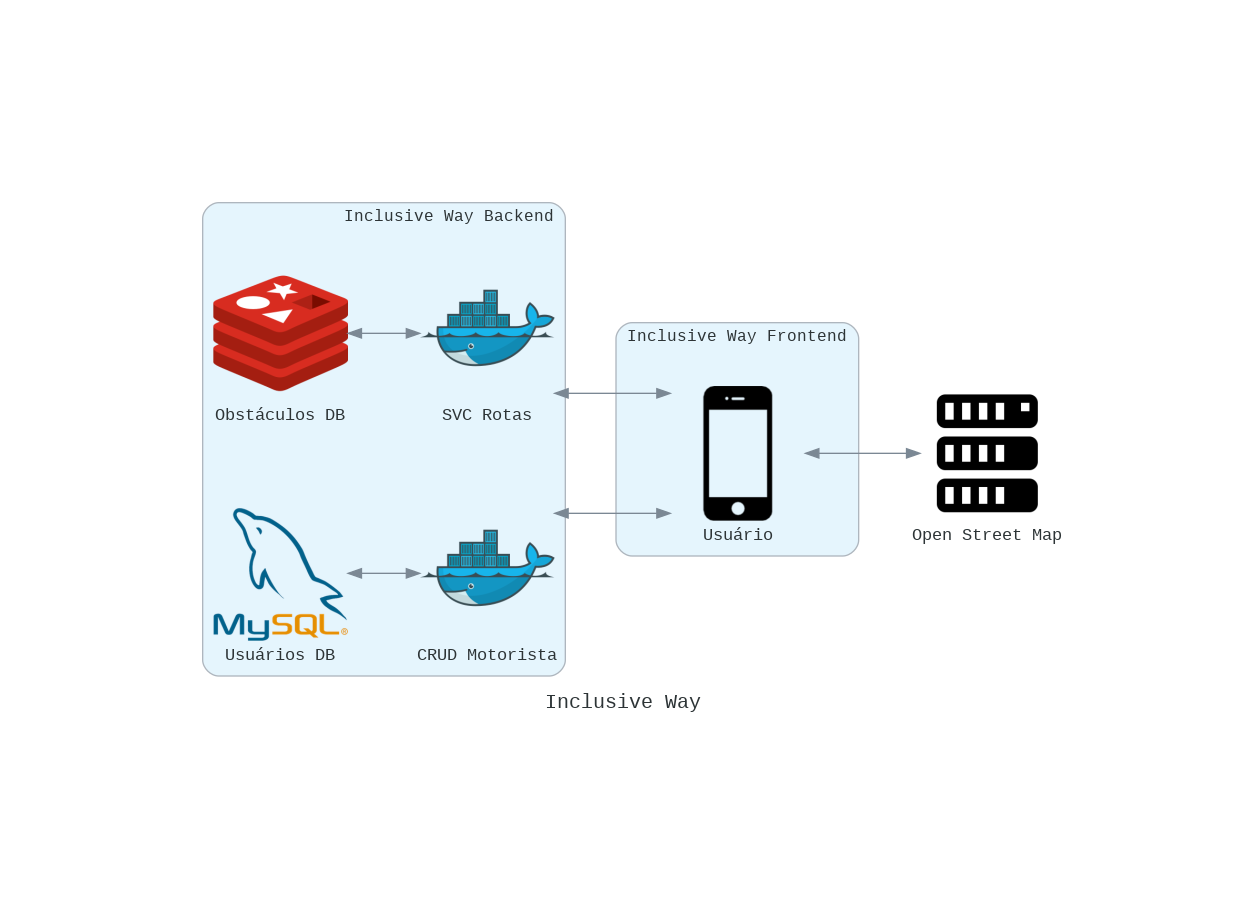

In [ ]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.database import MySQL
from diagrams.generic.device import Mobile
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.container import Docker
from diagrams.onprem.compute import Server

with Diagram("Inclusive Way", direction="RL") as diag:

    with Cluster("Inclusive Way Frontend"):
      user = Mobile("Usuário")

    with Cluster("Inclusive Way Backend"):
      bd = MySQL("Usuários DB")
      svc_crud_usuario = Docker("CRUD Motorista")

      redis = Redis("Obstáculos DB")
      svc_rotas = Docker("SVC Rotas")

      svc_rotas >> Edge() << redis
      user >> Edge() << svc_rotas
      svc_crud_usuario >> Edge() << bd
      user >> Edge() << svc_crud_usuario

    osm = Server("Open Street Map")
    osm >> Edge() << user
diag

# Diagrama Arquitetural bem simples

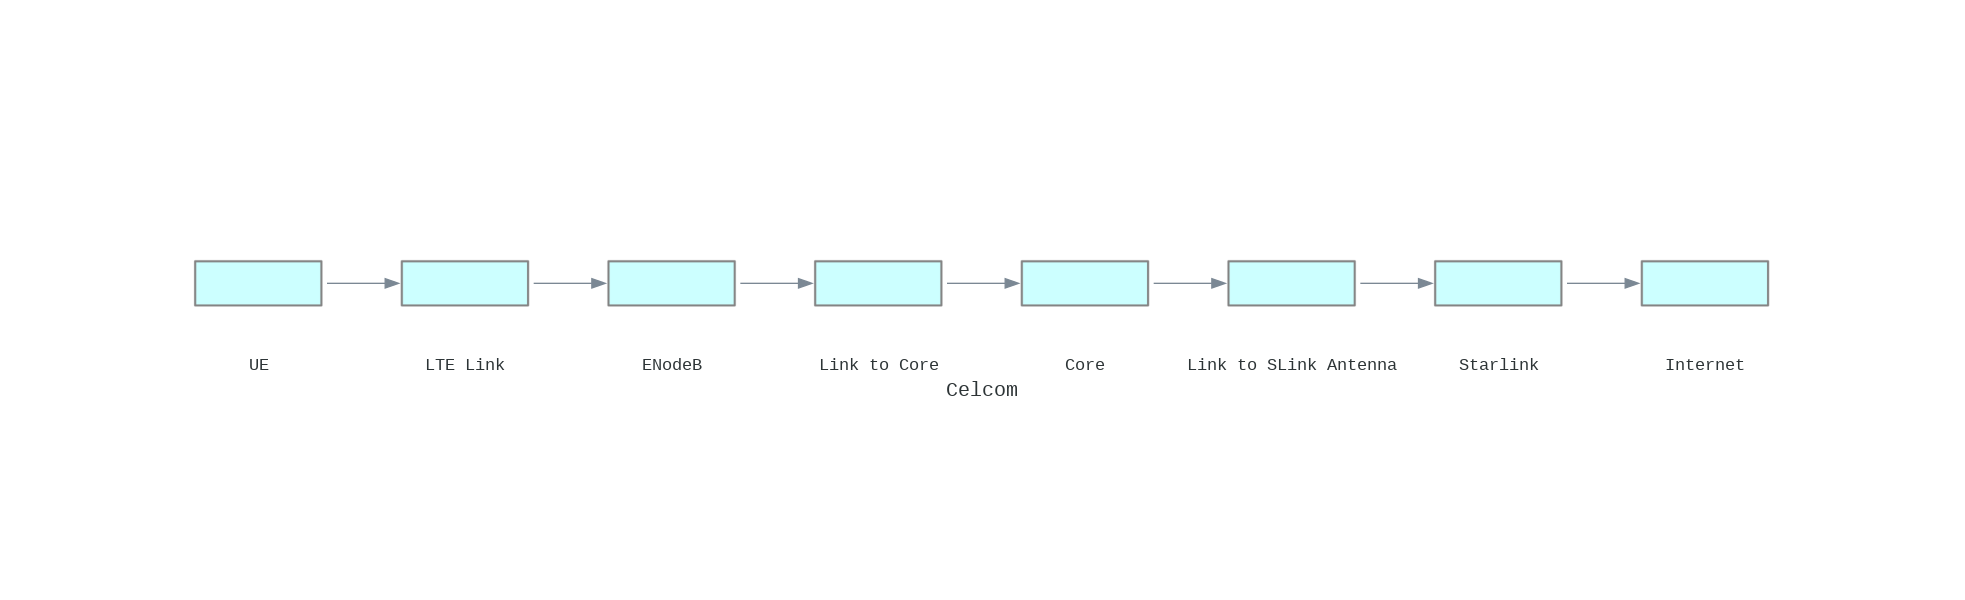

In [ ]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.database import MySQL
from diagrams.generic.device import Mobile
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.container import Docker
from diagrams.onprem.compute import Server
from diagrams.programming.flowchart import Action

with Diagram("Celcom", direction="LR") as diag:
    ue = Action("UE")
    link1 = Action("LTE Link")
    erb = Action("ENodeB")
    link2 = Action("Link to Core")
    core = Action("Core")
    link3 = Action("Link to SLink Antenna")
    stlink = Action("Starlink")
    link4 = Action("Internet")

    ue >> link1
    link1 >> erb
    erb >>  link2
    link2 >>  core
    core >>  link3
    link3 >>  stlink
    stlink >>  link4
diag

# Diagrama Arquitetural, mais complexo

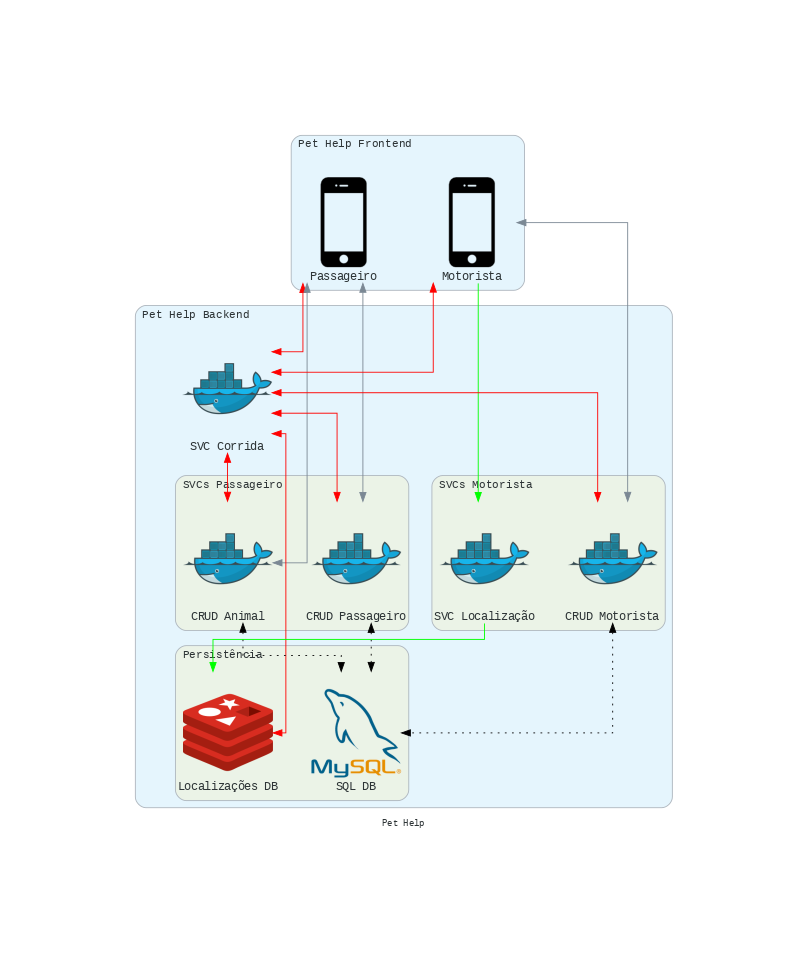

In [ ]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.database import MySQL
from diagrams.generic.device import Mobile
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.container import Docker

graph_attr = {
    "fontsize": "10",
    "size": "10",
    "bgcolor": "transparent"
}

with Diagram("Pet Help", graph_attr=graph_attr, direction="TB") as diag:

    with Cluster("Pet Help Frontend"):
      passag = Mobile("Passageiro")
      motori = Mobile("Motorista")

    with Cluster("Pet Help Backend"):
      with Cluster("Persistência"):
        bd = MySQL("SQL DB")
        redis = Redis("Localizações DB")

      with Cluster("SVCs Motorista"):
        svc_crud_moto = Docker("CRUD Motorista")
        svc_loc = Docker("SVC Localização")

      with Cluster("SVCs Passageiro"):
        svc_crud_ani = Docker("CRUD Animal")
        svc_crud_pass = Docker("CRUD Passageiro")

      svc_corr = Docker("SVC Corrida")

      svc_corr >> Edge(color="red") << redis
      svc_corr >> Edge(color="red") << svc_crud_moto
      svc_corr >> Edge(color="red") << svc_crud_ani
      svc_corr >> Edge(color="red") << svc_crud_pass

      svc_crud_moto >> Edge(color="black",style="dotted") << bd
      svc_crud_ani >> Edge(color="black",style="dotted") << bd
      svc_crud_pass >> Edge(color="black",style="dotted") << bd
      svc_loc >> Edge(color="green") >> redis

    passag >> Edge() << svc_crud_ani
    passag >> Edge() << svc_crud_pass
    passag >> Edge(color="red") << svc_corr

    motori >> Edge() << svc_crud_moto
    motori >> Edge(color="red") << svc_corr
    motori >> Edge(color="green") >> svc_loc

diag

# Diagrama de Sequência

In [ ]:
import base64
import requests
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
sequenceDiagram
actor App_Motorista
loop Enquanto o app estiver em funcionamento
    App_Motorista->>SVC_Localizacao: (lat,long)
    SVC_Localizacao->>DB_Localizacao: (lat,long)
    Note right of DB_Localizacao: Localização registrada
end
""")

# Diagrama de Sequência, mais complexo

In [ ]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
sequenceDiagram
autonumber
actor App_Passageiro
actor App_Motorista
App_Passageiro->>SVC_Corrida: Procurar corrida em (lat,long)
SVC_Corrida->>DB_Localizacao: Recupera motoristas próximos (lat,long)
DB_Localizacao->>SVC_Corrida: Lista de motoristas próximos
SVC_Corrida->>SVC_CRUD_Passageiro: Recupera dados do passageiro
SVC_CRUD_Passageiro->>SVC_Corrida: Dados do passageiro
SVC_Corrida->>SVC_CRUD_Animal: Recupera dados do pet
SVC_CRUD_Animal->>SVC_Corrida: Dados do pet
SVC_Corrida->>SVC_CRUD_Moto: Recupera dados dos motoristas que podem atender ao pet e passageiro
SVC_CRUD_Moto->>SVC_Corrida: Dados dos motoristas
Note right of SVC_Corrida: Ordena lista preferencial de motoristas
loop Enquanto um motorista não aceitar e houver motoristas na lista
  SVC_Corrida->>App_Motorista: Envia corrida ao motorista
  alt Motorista aceita
    App_Motorista->>SVC_Corrida: Corrida aceita
    SVC_Corrida->>App_Passageiro: Corrida aceita, dados do motorista
  else Motorista não aceita
    App_Motorista->>SVC_Corrida: Corrida rejeitada
  end
end
""")